### Import Libraries

In [40]:
import numpy as np
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Load Data

In [2]:
#Loading the arff data
data_1year = arff.loadarff('./data/1year.arff')
data_2year = arff.loadarff('./data/2year.arff')
data_3year = arff.loadarff('./data/3year.arff')
data_4year = arff.loadarff('./data/4year.arff')
data_5year = arff.loadarff('./data/5year.arff')

#Creating five separate dataframes
data_1year = pd.DataFrame(data_1year[0])
data_2year = pd.DataFrame(data_2year[0])
data_3year = pd.DataFrame(data_3year[0])
data_4year = pd.DataFrame(data_4year[0])
data_5year = pd.DataFrame(data_5year[0])

### Ensure Data Loaded

In [3]:
data_1year.head(5);

In [4]:
data_2year.head(5);

In [5]:
data_3year.head(5);

In [6]:
data_4year.head(5);

In [7]:
data_5year.head(5);

### Number and name of features all the same? If so, combine.

In [8]:
len(data_1year.columns) == len(data_2year.columns) == len(data_3year.columns) == len(data_4year.columns) == len(data_5year.columns)

True

In [9]:
print((data_1year.columns) == (data_2year.columns))
print((data_1year.columns) == (data_3year.columns))
print((data_1year.columns) == (data_4year.columns))
print((data_1year.columns) == (data_5year.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True

In [10]:
data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
len(data_1year) + len(data_2year) + len(data_3year) + len(data_4year) + len(data_5year) == len(data)

True

In [11]:
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
43402,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
43403,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [12]:
np.unique(data['class']);

In [13]:
values_data = pd.DataFrame(data.isnull().sum())
percentage_data = pd.DataFrame(((data.isnull().sum())/len(data))*100)
print(values_data)
print(percentage_data)

          0
Attr1     8
Attr2     8
Attr3     8
Attr4   134
Attr5    89
...     ...
Attr61  102
Attr62  127
Attr63  134
Attr64  812
class     0

[65 rows x 1 columns]
               0
Attr1   0.018431
Attr2   0.018431
Attr3   0.018431
Attr4   0.308720
Attr5   0.205046
...          ...
Attr61  0.234996
Attr62  0.292593
Attr63  0.308720
Attr64  1.870752
class   0.000000

[65 rows x 1 columns]


In [14]:
missing_data = pd.concat([values_data, percentage_data], axis=1)
missing_data.columns = ['Number of Missing Values','Percentage of Dataset']
pd.set_option('display.max_rows', 65)
missing_data.sort_values('Percentage of Dataset', ascending = False)

,Number of Missing Values,Percentage of Dataset
Attr37,18984,43.736897
Attr21,5854,13.486925
Attr27,2764,6.367930
Attr60,2152,4.957954
Attr45,2147,4.946435
Attr24,922,2.124179
Attr64,812,1.870752
Attr53,812,1.870752
Attr28,812,1.870752
Attr54,812,1.870752


In [15]:
data.iloc[:, 0];

In [16]:
data = data.replace(b'0','NO');
data = data.replace(b'1','YES');
data;

In [17]:
#data.to_csv(r'/Users/ZacharyHarris/Documents/GitHub/Bank/data.csv', index = True)
#missing_data.to_csv(r'/Users/ZacharyHarris/Documents/GitHub/Bank/missing_data.csv', index = True)


In [18]:
i = np.arange(len(data.columns))
for i in np.arange(len(data.columns)-1):
    data.iloc[:, i].fillna(data.iloc[:, i].mean(), inplace = True)

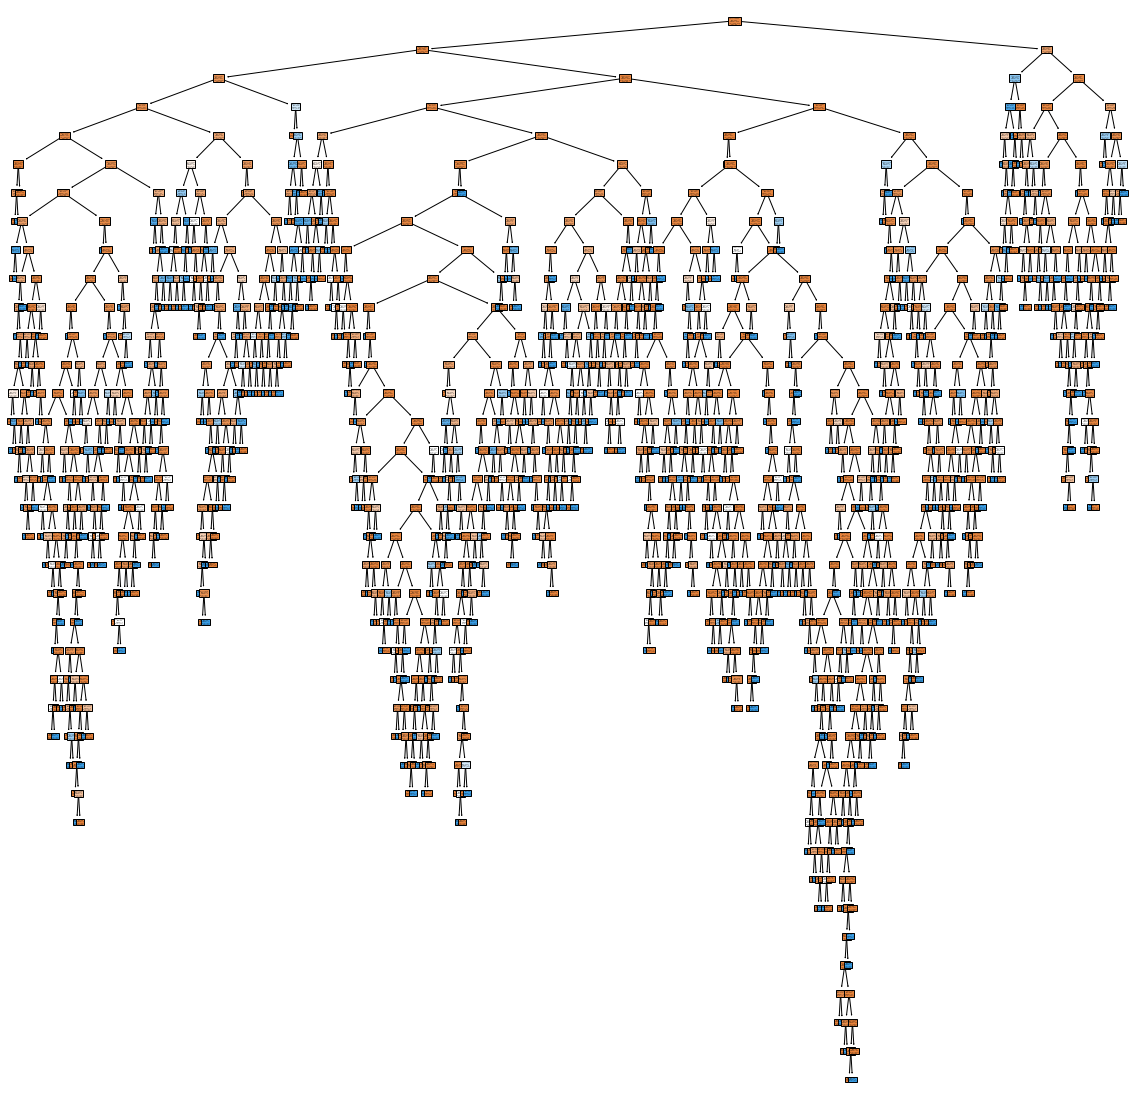

In [19]:
X = data.loc[:, data.columns != 'class']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
plt.rcParams["figure.figsize"] = (20,20)
tree.plot_tree(clf, feature_names = data.columns, class_names = ["NO","YES"], filled = True)
plt.show()

In [20]:
clf.score(X_test, y_test)

0.9485809067453004

In [47]:
y_pred = clf.predict(X_test)

In [48]:
print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None, zero_division=1))

0.7395775247762177
0.9485809067453004
0.9485809067453004
[0.97177498 0.50738007]
[0.97177498 0.50738007]
[0.97177498 0.50738007]


In [50]:
print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None, zero_division=1))

0.729954056046539
0.9485809067453004
0.9496605455141831
[0.97404239 0.48586572]
[0.97404239 0.48586572]
[0.97404239 0.48586572]


In [21]:
x=[0,0,0,0,0,0,0,0,0,0]
y=[0,0,0,0,0,0,0,0,0,0]
for i in np.arange(10):
    modelRF = RandomForestClassifier(n_estimators=100,
                                     criterion='gini', 
                                     max_depth=None, 
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_features='auto', 
                                     max_leaf_nodes=None, 
                                     min_impurity_decrease=0.0, 
                                     bootstrap=True, 
                                     oob_score=False, 
                                     n_jobs=None, 
                                     random_state=None, 
                                     verbose=0, 
                                     warm_start=False, 
                                     class_weight=None, 
                                     ccp_alpha=i/(10**i), 
                                     max_samples=None)
    modelRF.fit(X_train, y_train);
    y[i]=modelRF.score(X_test,y_test);
    x[i]=modelRF.ccp_alpha


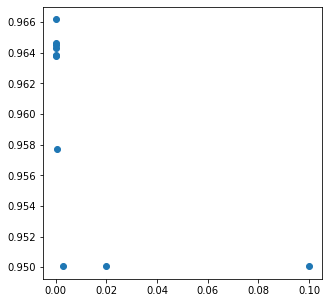

In [22]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(x,y)

In [23]:
x

[0.0, 0.1, 0.02, 0.003, 0.0004, 5e-05, 6e-06, 7e-07, 8e-08, 9e-09]

In [24]:
y

[0.9638776262440103,
 0.9500552893475857,
 0.9500552893475857,
 0.9500552893475857,
 0.9577036490969406,
 0.9661813490600811,
 0.9637854773313674,
 0.9643383708072245,
 0.964614817545153,
 0.9645226686325101]

In [25]:
modelRF.score(X_test,y_test)
#prediction_RF = modelRF.predict(X_test)

0.9645226686325101

In [44]:
y_pred = modelRF.predict(X_test)

In [45]:
print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None, zero_division=1))

0.6666842638358488
0.9645226686325101
0.9645226686325101
[0.99757517 0.33579336]
[0.99757517 0.33579336]
[0.99757517 0.33579336]


In [46]:
print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None, zero_division=1))

0.9227041794587285
0.9645226686325101
0.9618384007893952
[0.96618131 0.87922705]
[0.96618131 0.87922705]
[0.96618131 0.87922705]


In [26]:
# params ={'n_estimators': 100,
#          'criterion': 'gini',
#          'max_depth': None,
#          'min_samples_split': 2,
#          'min_samples_leaf': 1,
#          'min_weight_fraction_leaf':0,
#          'max_features':'sqrt',
#          'max_leaf_nodes': None,
#          'min_impurity_decrease':0.0,
#          'bootstrap':True,
#          'oob_score':False,
#          'n_jobs':None,
#          'random_state':None,
#          'verbose':0,
#          'warm_start':False,
#          'class_weight':None,
#          'ccp_alpha':0.0,
#          'max_samples':None}

In [27]:
XGBmodel = XGBClassifier()
XGBmodel.fit(X_train, y_train)

XGBClassifier()

In [36]:
y_pred = XGBmodel.predict(X_test)

In [34]:
XGBmodel.score(X_test,y_test)

0.9698673055657944

In [38]:
print(recall_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='micro'))
print(recall_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None, zero_division=1))

0.7044575717338163
0.9698673055657944
0.9698673055657944
[0.99932105 0.4095941 ]
[0.99932105 0.4095941 ]
[0.99932105 0.4095941 ]


In [43]:
print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='weighted'))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None))
print(precision_score(y_test, y_pred, average=None, zero_division=1))

0.9696544985400797
0.9698673055657944
0.9698544888255501
[0.96987668 0.96943231]
[0.96987668 0.96943231]
[0.96987668 0.96943231]
